<a href="https://colab.research.google.com/github/DiahKurnillah/Praktikum-Komputasi-Biomedis/blob/main/KombioPrak_ChapIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4. System of Linear Equation: Gauss Elimination**

---
**Tujuan**: Untuk menentukan hasil dari sistem persamaan linear dengan menggunakan metode Eliminasi Gauss.

**Literature Review**

Penyelesaian sistem persamaan linear adalah dengan menyelesaikan setiap variabel. Beberapa metode telah digunakan untuk menyelesaikan sistem persamaan linear, seperti:
1. Eliminasi Gauss
2. Invers dari Matriks

Operasi Baris Elementer:

Ada tiga operasi yang dapat dilakukan terhadap sistem persamaan linear tanpa mengubah solusi sebenarnya, yaitu:
1. Mengatur ulang urutan persamaan.
2. Mengalikan persamaan dengan bilangan bukan nol.
3. Mengubah sebuah persamaan dengan menambahkan persamaan tersebut dengan perkalian persamaan lain.

Semua cara tersebut dapat diterapkan pada matriks penuh dan disebut dengan Operasi Baris Elementer (ERO). Dengan menggunakan ERO, matriks penuh diubah menjadi matriks berdasarkan sistem persamaan linear yang lebih mudah diselesaikan. Matriks yang memiliki karakteristik ini disebut Matriks Eselon. Sebuah matriks disebut matriks eselon jika memenuhi dua karakteristik, yaitu:
1. Jika ada sebuah baris yang semua elemennya bernilai nol, maka baris tersebut harus ditempatkan di bawah baris yang memiliki elemen bukan nol.
2. Pada baris yang memiliki elemen tidak nol, elemen tidak nol tersebut harus diletakkan di sebelah kanan elemen tidak nol pada baris sebelumnya (elemen tidak nol ini disebut elemen prinsip)

Cara menyelesaikan sistem persamaan linear dengan menggunakan metode eliminasi Gauss dapat dilakukan sebagai berikut.
1. Membentuk matriks lengkap dari sistem persamaan linear
2. Mengubah matriks penuh menjadi matriks eselon dengan beberapa operasi baris elementer
3. Mendapatkan solusi dari sistem persamaan linear.

Sebagai contoh, jika diketahui beberapa persamaan seperti di bawah ini, maka:
$$a11x + a12y + a13z = b1$$
$$a21x + a22y + a23z = b2$$
$$a31x + a32y + a33z = b3$$
Matriks awal:
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix} =
\begin{bmatrix} b_{1} \\ b_{2} \\ b_{3} \end{bmatrix}



Dengan menggunakan operasi baris elementer, sebuah matriks eselon diperoleh.

$z = b3'$
$y + a23z = b2' --> y = b2' - a23z$
$x + a12y + a13z = b1' --> x = b1' - a12y - a13z$


# Prelimiary Task
Jika terdapat fungsi sebagai berikut: $$𝑎 + 𝑏 + 𝑐 = 6$$ $$𝑎 + 2𝑏 - 𝑐 = 2$$ $$2𝑎 + 𝑏 + 2𝑐 = 10$$
Tentukanlah a, b, dan c!

In [ ]:
import numpy as np

# Define the augmented matrix [A|B]
A = np.array([[1.0, 1.0, 1.0],
              [1.0, 2.0, -1.0],
              [2.0, 1.0, 2.0]])

B = np.array([6.0, 2.0, 10.0])

# Perform Gauss elimination
n = len(B)
X = np.zeros(n)

for i in range(n):
    # Partial Pivoting
    max_row = i
    for k in range(i + 1, n):
        if abs(A[k, i]) > abs(A[max_row, i]):
            max_row = k
    A[[i, max_row]] = A[[max_row, i]]
    B[i], B[max_row] = B[max_row], B[i]

    # Elimination
    for k in range(i + 1, n):
        factor = A[k, i] / A[i, i]
        B[k] -= factor * B[i]
        A[k, i:] -= factor * A[i, i:]

# Back-substitution
for i in range(n - 1, -1, -1):
    X[i] = (B[i] - np.dot(A[i, i + 1:], X[i + 1:])) / A[i, i]

print("Solution:")
print(X)


Solution:
[1. 2. 3.]


Pada kode ini digunakan looping untuk melakukan proses eliminasi Gauss dan back-substitution pada system persamaan linear. Pada looping eliminasi Gauss, iterasi pertama dilakukan untuk setiap baris pada matriks A (matriks koefisien). Pada setiap iterasi, dilakukan Partial Pivoting untuk mencari baris dengan elemen terbesar di kolom saat ini. Baris yang memiliki elemen terbesar ditukar dengan baris saat ini. Kemudian, dilakukan eliminasi untuk menghasilkan matriks segitiga atas (upper triangular). Pada looping back-substitution, iterasi kedua dilakukan untuk melakukan substitusi mundur pada system setelah matriks A diubah menjadi matriks segitiga atas. Dimulai dari baris terakhir (n-1) menuju baris pertama (0). Setiap iterasi menghitung nilai variabel yang tidak diketahui menggunakan nilai yang sudah diketahui dari iterasi sebelumnya. Dari kedua looping ini akan didapatkan Solusi dari system persamaan linear.

# Task

**Pharmacokinetic modelling for ”animal-on-chip”**

A material balance is performed for naphthalene epoxide (NO) generation, consumption, and transport in the μCCA device described in Figure 4.1; NO is an intermediate formed during the metabolism of naphthalene.
Routes of generation of naphthalene epoxide:
(1) conversion of naphthalene into its epoxide.
Routes of consumption of naphthalene epoxide:
(1) conversion of epoxide to naphthalene dihydrodiol;
(2) binding to GSH to form epoxide–GSH conjugates;
(3) rearrangement to naphthol.
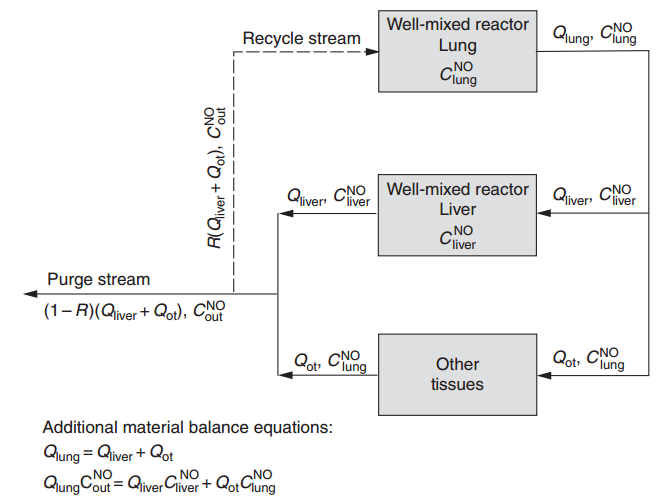

*Figure 4.1. Material balance diagram for naphtalene epoxide*





The material balance diagram for naphthalene epoxide (NO) is shown in Figure 4.1. Since we are dealing with a multicomponent system, we use superscripts N, NO, and NOH for naphthalene, naphthalene epoxide, and naphthol, respectively, to differentiate between the concentration terms in various compartments.
A mass balance of NO is performed over the two chambers – lung and liver. This yields two linear equations in the unknowns 𝐶𝑙𝑢𝑛𝑔𝑁𝑂 and 𝐶𝑙𝑖𝑣𝑒𝑟𝑁𝑂. Note that simplifications have been made to the original equations (Quick and Shuler, 1999) by assuming that 𝐶𝑙𝑢𝑛𝑔𝑁𝑂 and 𝐶𝑙𝑖𝑣𝑒𝑟𝑁𝑂 are small in comparison to relevant constants present in the equations.

**Lung compartment:**
> \begin{align}
& R(Q_{\text{liver}} C_{\text{liver}}^{\text{NO}} + Q_{\text{ot}} C_{\text{lung}}^{\text{NO}}) + v_{\text{max,P450-lung}} V_{\text{lung}} \\
& - \frac{v_{\text{max,P450-lung}}}{K_{\text{m,EH-lung}}} V_{\text{lung}} - v_{\text{lung}} \\
& + \frac{v_{\text{max,GSTC\_lung^NO}} C_{\text{lung}}^{\text{GSH}}}{K_{\text{L,lung}} + K_{\text{2,lung}} C_{\text{lung}}^{\text{GSH}}} \\
& - K_{\text{NOH}} \exp(l_{\text{NOH}} T_{\text{P,lung}}) C_{\text{lung}}^{\text{NO}} V_{\text{lung}} - Q_{\text{lung}} C_{\text{lung}}^{\text{NO}} = 0 \\
& \\
\end{align}


**Liver compartment:**
>\begin{align}
& Q_{\text{liver}} C_{\text{lung}}^{\text{NO}} + v_{\text{max,P450-lung}} V_{\text{liver}} \\
& - \frac{v_{\text{max,P450-liverC\_liver^NO}}}{K_{\text{m,EH-liver}}} V_{\text{liver}} - V_{\text{liver}} \\
& + \frac{v_{\text{max,GSTC\_liver^NO}} C_{\text{liver}}^{\text{GSH}}}{K_{\text{L,liver}} + K_{\text{2,liver}} C_{\text{liver}}^{\text{GSH}}} \\
& - K_{\text{NOH}} \exp(l_{\text{NOH}} T_{\text{P,liver}}) C_{\text{liver}}^{\text{NO}} V_{\text{liver}} - Q_{\text{liver}} C_{\text{liver}}^{\text{NO}} = 0 \\
\end{align}

**NO balance assumptions**
1. Binding of naphthalene epoxide to proteins is comparatively less important and can be neglected.
2. The concentration of GSH in cells is constant. It is assumed that GSH is resynthesized at the rate of consumption.
3. Production of the RS enantiomer of the epoxide (compared to SR oxide) is dominant, and hence reaction parameters pertaining to RS production only are used.
4. The total protein content in the cells to which the metabolites bind remains constant.
The parametric values and definitions are provided below. The modeling parameters correspond to naphthalene processing in mice.

**Flowrates**

Qlung: flowrate through lung compartment = 2 μl/min;

Qliver: flowrate through liver compartment = 0.5 μl/min;

Qot: flowrate through other tissues compartment = 1.5 μl/min.


**Compartment volumes**

Vlung: volume of lung compartment = 2 mm × 2mm × 20 μm = 8 × 10l = 0.08μl

Vliver: volume of liver compartment = 3.5 mm × 4.6 mm × 20 μm = 3.22 × 10-7l = 0.322 μl.


**Reaction constants**

(1) Naphthalene → naphthalene epoxide
vmax,P450-lung: maximum reaction velocity for conversion of naphthalene into napthalene epoxide by cytochrome P450 monooxygenases in lung cells = 8.75 μM/min;

vmax,P450-liver: maximum reaction velocity for conversion of naphthalene into napthalene epoxide by cytochrome P450 monooxygenases in liver cells = 118 μM/min.

(2) Naphthalene epoxide → naphthalene dihydrodiol
vmax,EH-lung: maximum reaction velocity for conversion of naphthalene epoxide to dihydrodiol by epoxide hydrolase in the lung = 26.5 μM/min;

Km,EH-lung: Michaelis constant = 4.0 μM;
vmax,EH-liver: maximum reaction velocity for conversion of naphthalene epoxide to dihydrodiol by epoxide hydrolase in the liver = 336 μM/min;

Km,EH-lung: Michaelis constant = 21 μM

(3) Naphthalene epoxide → naphthol
kNOH: rate constant for rearrangement of epoxide to naphthol = 0.173 μM/μM of NO/min;
lNOH: constant that relates naphthol formation rate to total protein content = − 20.2 ml/g protein

(4) Naphthalene epoxide → epoxide–GSH conjugates
vmax, GST: maximum reaction velocity for binding of naphthalene epoxide to GSH catalyzed by GST (glutathione S-transferase) = 2750 μM/min;

K1lung: constant in epoxide–GSH binding rate = 310 000 μM2;

K2lung: constant in epoxide–GSH binding rate = 35 μM;

K1liver: constant in epoxide–GSH binding rate = 150 000 μM2;

K2liver: constant in epoxide–GSH binding rate = 35 μM.



**Protein concentrations**

TPlung: total protein content in lung compartment = 92 mg/ml;

TPliver: total protein content in liver compartment = 192 mg/ml;

𝐶𝑙𝑢𝑛𝑔𝐺𝑆𝐻: GSH concentration in lung compartment = 1800 μM;

𝐶𝑙𝑖𝑣𝑒𝑟𝐺𝑆𝐻: GSH concentration in liver compartment = 7500 μM;
R: fraction of the exiting stream that reenters the microcircuit.

Your goal is to vary the recycle fraction from 0.6 to 0.95 in increasing increments of 0.05 in order to study the effect of reduced excretion of toxicant on circulating concentration values of naphthalene and its primary metabolite naphthalene epoxide.

a. Use the Gaussian elimination method to determine the napthalene epoxide concentrations at the outlet of the lung and liver compartments of the animalon-a-chip for the range of R specified.

b. Plot the concentration values of epoxide in the liver and lung chambers as a function of R.

Persamaan dari lung compartment:
\begin{align}
\leftrightarrow R(Q_{\text{liver}} C_{\text{liver}}^{\text{NO}} + Q_{\text{ot}} C_{\text{lung}}^{\text{NO}}) + v_{\text{max,P450-lung}} V_{\text{lung}} \
 - \frac{v_{\text{max,P450-lungC\_liver^NO}}}{K_{\text{m,EH-lung}}} V_{\text{lung}} - V_{\text{lung}} \
 + \frac{v_{\text{max,GSTC\_lung^NO}} C_{\text{lung}}^{\text{GSH}}}{K_{\text{L,lung}} + K_{\text{2,lung}} C_{\text{lung}}^{\text{GSH}}} \
 - K_{\text{NOH}} \exp(l_{\text{NOH}} T_{\text{P,lung}}) C_{\text{lung}}^{\text{NO}} V_{\text{lung}} - Q_{\text{lung}} C_{\text{lung}}^{\text{NO}} = 0
\end{align}


\begin{align}
\leftrightarrow R(0.5C_{\text{liver}}^{\text{NO}} + 1.5C_{\text{lung}}^{\text{NO}}) + 8.75 \times 0.08 \ - \frac{8.75C_{\text{liver}}^{\text{NO}}}{4.0 \times 0.08} - 0.08 \times \frac{(2750C_{\text{lung}}^{\text{NO}} \times 1800)}{310000 + 35 \times 1800} \ - 0.173 \exp(-20.2 \times 92) C_{\text{lung}}^{\text{NO}} \times 0.08 - 2C_{\text{lung}}^{\text{NO}} = 0
\end{align}

\begin{align}
\leftrightarrow (0.5RC_{\text{liver}}^{\text{NO}} + 1.5RC_{\text{lung}}^{\text{NO}}) + 0.7 - 0.175C_{\text{lung}}^{\text{NO}} \
- 1.062C_{\text{lung}}^{\text{NO}} - 2C_{\text{lung}}^{\text{NO}} = 0
\end{align}

\begin{align}\leftrightarrow 0.5RC_{\text{liver}}^{\text{NO}} + 1.5RC_{\text{lung}}^{\text{NO}} - 3.237C_{\text{lung}}^{\text{NO}} = -0.7
\end{align}


\begin{align*}
& \leftrightarrow 0.5RC_{\text{liver}}^{\text{NO}} + (1.5R - 3.237) C_{\text{lung}}^{\text{NO}} = -0.7
\end{align*}


Persamaan dari Liver compartment
\begin{align*}
& \leftrightarrow Q_{\text{liver}} C_{\text{lung}}^{\text{NO}} + v_{\text{max,P450-lung}} V_{\text{liver}} - \frac{v_{\text{max,P450-liverC\_liver^NO}}}{K_{\text{m,EH-liver}}} V_{\text{liver}} \\
& - V_{\text{liver}} + \frac{v_{\text{max,GSTC\_liver^NO}} C_{\text{liver}}^{\text{GSH}}}{K_{\text{L,liver}} + K_{\text{2,liver}} C_{\text{liver}}^{\text{GSH}}} \\
& - K_{\text{NOH}} \exp(l_{\text{NOH}} T_{\text{P,liver}}) C_{\text{liver}}^{\text{NO}} V_{\text{liver}} - Q_{\text{liver}} C_{\text{liver}}^{\text{NO}} = 0
\end{align*}

\begin{align*}
& \leftrightarrow 0.5C_{\text{lung}}^{\text{NO}} + 8.75 \times 0.322 - \frac{118C_{\text{liver}}^{\text{NO}}}{21 \times 0.322} \\
& - 0.322 \times \frac{2750 \times C_{\text{liver}}^{\text{NO}} \times 7500}{K_{\text{L,liver}} + K_{\text{2,liver}} C_{\text{liver}}^{\text{GSH}}} \\
& - 0.173 \exp(-20.2 \times 192) C_{\text{liver}}^{\text{NO}} \times 0.322 - 0.5C_{\text{liver}}^{\text{NO}} = 0
\end{align*}

\begin{align*}
& \leftrightarrow 0.5C_{\text{lung}}^{\text{NO}} + 2.818 - 1.809C_{\text{liver}}^{\text{NO}} - 16.1C_{\text{liver}}^{\text{NO}} - 0.5C_{\text{liver}}^{\text{NO}} = 0
\end{align*}

\begin{align*}
& \leftrightarrow 0.5C_{\text{lung}}^{\text{NO}} - 18.409C_{\text{liver}}^{\text{NO}} = -2.818
\end{align*}

\begin{align*}
& \leftrightarrow 18.409C_{\text{liver}}^{\text{NO}} - 0.5C_{\text{lung}}^{\text{NO}}   = 2.818
\end{align*}

dimana bentuk matriksnya menjadi
\begin{bmatrix}
0.5R & 1.5R - 3.237 \\
18.409 & -0.5
\end{bmatrix}
\begin{bmatrix}
C_{\text{liver}}^{\text{NO}} \\
C_{\text{lung}}^{\text{NO}}
\end{bmatrix}
=
\begin{bmatrix}
-0.7 \\
2.818
\end{bmatrix}





> Persamaan 1 $0.5𝑅𝑥1 + (1.5𝑅−3.237)𝑥2=−0.7.....(1)$

> Persamaan 2 $18.409𝑥1 −0.5𝑥2=2.818 .....(2)$


In [ ]:
import numpy as np
import pandas as pd
from numpy import *
from prettytable import PrettyTable

R_values = []
lung_epoxide_concentrations = []
liver_epoxide_concentrations = []

# Define the augmented matrix [A|B]
for r in arange(0.6, 1.0, 0.05):
    a = np.array([[0.5 * r, (1.5 * r - 3.237)], [18.409, -0.5]])
    b = np.array([[-0.7], [2.818]])
    n = len(b)

    for k in range(0, n - 1):
        for i in range(k + 1, n):
            pivot = a[i][k] / a[k][k]
            for j in range(k, n):
                a[i][j] = a[i][j] - pivot * a[k][j]
            b[i] = b[i] - pivot * b[k]

    # backward solve
    x = zeros((n, 1))
    x[n - 1] = b[n - 1] / a[n - 1][n - 1]

    for i in range(n - 2, -1, -1):
        sum = 0
        for j in range(i + 1, n):
            sum = sum + a[i][j] * x[j]
        x[i] = (b[i] - sum) / a[i][i]

    # Append the results to the respective lists
    R_values.append(r)
    lung_epoxide_concentrations.append(x[0][0])
    liver_epoxide_concentrations.append(x[1][0])

print("Solution:")

# Create a PrettyTable to store the results
table = PrettyTable()
table.field_names = ["R", "Liver Concentration", "Lung Concentration"]

# Add data to the PrettyTable
for i in range(len(R_values)):
    table.add_row([f"{R_values[i]:.2f}", f"{lung_epoxide_concentrations[i]:.4f}", f"{liver_epoxide_concentrations[i]:.4f}"])

# Print the PrettyTable
print(table)


Solution:
+------+---------------------+--------------------+
|  R   | Liver Concentration | Lung Concentration |
+------+---------------------+--------------------+
| 0.60 |        0.1618       |       0.3203       |
| 0.65 |        0.1621       |       0.3328       |
| 0.70 |        0.1625       |       0.3461       |
| 0.75 |        0.1629       |       0.3604       |
| 0.80 |        0.1633       |       0.3757       |
| 0.85 |        0.1637       |       0.3922       |
| 0.90 |        0.1642       |       0.4101       |
| 0.95 |        0.1647       |       0.4295       |
+------+---------------------+--------------------+


Pada tabel hasil akhir, dapat disimpulkan bahwa apabila nilai variasi R semakin meningkat maka nilai Lung epoxide dan Liver epoxide juga akan meningkat. Hal ini menandakan bahwa makin besar nilai R atau fraksi dari aliran luar yang masuk kembali ke sirkuit mikro, nilai konsentrasi napthalene epoxide ikut meningkat.

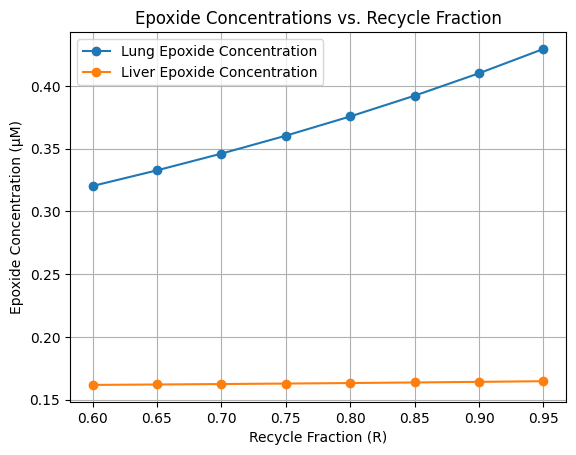

In [ ]:
import pylab as plt

# Plot the concentration values of epoxide in the lung and liver chambers as a function of R
plt.plot(R_values, lung_epoxide_concentrations, 'o-', label='Lung Epoxide Concentration')
plt.plot(R_values, liver_epoxide_concentrations, 'o-', label='Liver Epoxide Concentration')
plt.xlabel('Recycle Fraction (R)')
plt.ylabel('Epoxide Concentration (μM)')
plt.title('Epoxide Concentrations vs. Recycle Fraction')
plt.legend()
plt.grid(True)
plt.show()

Hal tersebut juga dapat dilihat dari plot grafik akhir, yang mana sumbu x mewakili variasi nilai R dan sumbu y mewakili variasi nilai Lung epoxide dan Liver epoxide. Kenaikan grafik nilai Liver epoxide lebih signifikan daripada Lung epoxide, sehingga diperoleh kesimpulan bahwa pengaruh variasi nilai R lebih besar untuk konsentrasi napthalene epoxide di 𝐶𝑙𝑢𝑛𝑔𝑁𝑂 dari pada di 𝐶𝑙𝑖𝑣𝑒𝑟𝑁𝑂.